In [37]:
%matplotlib notebook

In [62]:
import radartrack as rt
import beeview
from pprint import pprint
import tifffile
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import subprocess

In [4]:
#load 3d scene and start renderer
scene = "D:\\Documents\\bachelorarbeit\\bee_view\\data\\sky_white\\skydome_white.obj";
ommatidia = "D:\\Documents\\bachelorarbeit\\bee_view\\data\\ommatidia.csv";

renderer = beeview.Renderer(scene, ommatidia, True) # also allow empty renderer and load scene later?
#renderer.set_verbose_lvl(2)

In [5]:
renderer.set_num_samples(56)

In [6]:
# load flights
flights = rt.data.flights['2013', ...]

In [91]:
# get interpolated data of first flight
# array of (time : int, position : [float, float], velocity : [float, float])
flight = flights[4] # nice fligth
flight = flights[3] # short flight with simple gaps


In [92]:
# render an image for each position

# smaller ommatidium size to save space
#renderer.set_ommatidium_size(4)

# put radar position in radartrack data
radar_pos = (-549.32727,-250.66711) # as numpy array?: easy fast vector math.

# TODO: also render gaps: straight flight, or render as black image
# posible to code background color depending on flight type (red for missing...)
# also add map with current position and plotted flight path

frames = []
image_width = renderer.get_beeeye_image_width()
image_height = renderer.get_beeeye_image_height()

for segment in flight.segments:
    if(segment.type != 'gap'):
        for idx, pos, v in segment.interpolated:
            print(str(idx)+ ": " + str(pos)+ ", " + str(v) + "\n")
            
            # make coords relative to radar position
            # get height above ground and adjust to 7m
            rel_pos = [pos[0] + radar_pos[0], 0, pos[1] + radar_pos[1]]
            
            h = renderer.measure_distance(rel_pos,[0,-1,0])
            renderer.set_position([rel_pos[0],0-h+5,rel_pos[2]])

            # set dir (checkout velocity, can use as dir?)
            renderer.set_direction([v[0],0,v[1]])


            # convert PIL image to numpy array. Better have renderer return numpy array?
            #im_np = np.array(im.getdata(),np.uint8).reshape(im.size[1], im.size[0], 3)

            frames.append(renderer.render()) # overload this function: render(pos, dir)?
            
            #how to prevent copies being made?

    else:
        #gap idx is i+1 to i-1
        
        #linearly interpolate gaps
        idx,p1,v = segment.interpolated[0]
        idxend,p2,v = segment.interpolated[-1]
        v = p2 - p1
        n = len(segment.interpolated) - 1
        for i in range(1,n):
            idx += 1
            d = 1/n * i
            pos = (1 - d) * p1 + d * p2
            print(str(idx)+ ": " + str(pos)+ ", " + str(v) + "\n")
            rel_pos = [pos[0] + radar_pos[0], 0, pos[1] + radar_pos[1]]
            h = renderer.measure_distance(rel_pos,[0,-1,0])
            renderer.set_position([rel_pos[0],0-h+5,rel_pos[2]])
            renderer.set_direction([v[0],0,v[1]])
            frames.append(renderer.render())

        if False:
            for idx, pos, v in segment.interpolated[1:-1]:
                #black image
                print(str(idx)+ ": " + str(pos)+ ", " + str(v) + "\n")
                frames.append(np.zeros((image_height,image_width,3),dtype=np.uint8))
                #frames.append(Image.new("RGB", (image_width, image_height), "black"))
            
            

            

#frames = np.asarray(frames)

# save the series as tiff file
#tifffile.imsave('myimages.tiff',frames)

# for easy conversion to movie with ffmep, better save each image seperately.
# image saver class, with options? tiff pages, sequence, movie?

# renderer: return "blank" (e.g. grey) eyes when nan? option for how to handle gaps? (leave out, render black, interpolate linearly)

0: [ 717.99381575   46.54383428], [-1.72754248 -0.17903646]

1: [ 712.28432056   45.92723777], [-2.52707692 -0.23051196]

2: [ 705.30453781   45.24337006], [-2.95726342 -0.24789248]

3: [ 702.65787985   44.89307705], [-2.99808589 -0.22922421]

4: [ 699.19459495   44.63646835], [-3.07508262 -0.20811816]

5: [ 697.35018882   44.60328893], [-3.02693104 -0.18433126]

6: [ 692.27792371   44.7071506 ], [-2.99117965 -0.16217441]

7: [ 686.46010754   44.5343687 ], [-3.15560352 -0.18328526]

8: [ 679.11835064   44.36901863], [-3.38244707 -0.22391553]

9: [ 671.29897474   43.88412164], [-3.74006544 -0.27055306]

10: [ 664.97731898   43.23910067], [-3.95409425 -0.32769522]

11: [ 658.27372575   42.505879  ], [-4.00265043 -0.35768517]

12: [ 651.71280334   41.64612141], [-4.02349799 -0.3451758 ]

13: [ 645.74107546   40.60307233], [-3.89172363 -0.31433855]

14: [ 637.86484129   39.14731791], [-3.8239185  -0.30881707]

15: [ 631.85185507   38.77217523], [-3.74714302 -0.22485189]

16: [ 626.7695198 


124: [ 831.25509105  -34.49054986], [ 2.37891174 -0.94208221]

125: [ 834.35693032  -34.56895097], [ 2.22314186 -1.000251  ]

126: [ 834.02057868  -35.02938998], [ 1.91303362 -1.0971228 ]

127: [ 831.91884097  -36.85201581], [ 1.23599284 -1.25337149]

128: [ 834.23242358  -40.7682958 ], [ 0.77765026 -1.56975976]

129: [ 836.20001163  -44.73377993], [ 0.80793768 -1.97053492]

130: [ 837.82313225  -48.66008223], [ 0.75073187 -2.23023171]

131: [ 838.97282853  -52.50945472], [ 0.60212786 -2.40370216]

132: [ 839.59419575  -56.33142034], [ 0.38086301 -2.54709804]

133: [ 839.68318214  -60.23236853], [ 0.11181998 -2.70714925]

133: [ 839.68318214  -60.23236853], [ 0.11181998 -2.70714925]

134: [ 839.25811866  -64.35554617], [-0.18403939 -2.91533552]

135: [ 838.34008512  -68.87401302], [-0.49204588 -3.18501433]

136: [ 836.94072128  -73.99096531], [-0.80203084 -3.50835015]

137: [ 835.05519768  -79.94041071], [-1.10473838 -3.85267498]

138: [ 832.6588732  -86.9806519], [-1.38840211 -4.1606


249: [ 280.68549434  139.35763264], [-4.47632652 -0.14008117]

250: [ 273.32898569  138.97689689], [-4.3957492   0.06507922]

251: [ 266.02836558  138.88031607], [-4.22499494  0.37118779]

252: [ 258.39293281  139.53659684], [-4.02956906  0.69048277]

253: [ 252.12175151  141.58407052], [-3.68935678  1.09074758]

254: [ 246.46751202  144.93564421], [-3.19156343  1.58680243]

255: [ 240.59277475  148.30776013], [-2.69289812  2.03647272]

256: [ 236.80400764  153.02624365], [-2.18383216  2.39465776]

257: [ 234.9249698   158.66471083], [-1.63266683  2.68887997]

258: [ 234.53436133  164.37915993], [-1.11102251  2.80710041]

259: [ 236.49836478  171.0987258 ], [-0.45039558  2.89387952]

260: [ 237.62379376  177.15827858], [ 0.19768908  2.95182207]

261: [ 238.40409299  181.77736512], [ 0.5213819   2.75639896]

262: [ 239.19352741  185.4669086 ], [ 0.63551431  2.36697947]

263: [ 240.35526674  188.43754998], [ 0.62187827  1.92761833]

264: [ 242.29419364  190.80413781], [ 0.56427385  1.53

In [93]:
# save as tiff stack (multi page tiff)
tifffile.imsave('flight_3.tiff',np.array(frames), compress=6)

In [12]:
np_frames = np.array(frames)

<IPython.core.display.Javascript object>


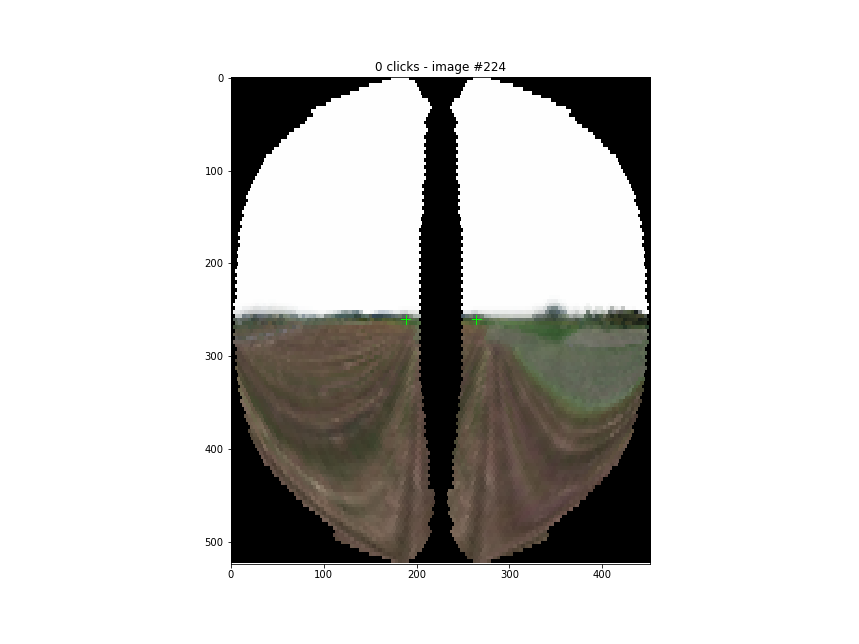

In [82]:
# make my own viewer:

fig,ax = plt.subplots()
im = ax.imshow(np_frames[0]) 

nclicks = 0
i = 0
plt.title('{} clicks - image #{}'.format(nclicks, i))

def onclick(event):
    global i
    i += 1
    im.set_data(np_frames[i])
    if i == len(np_frames) - 1:
        fig.canvas.mpl_disconnect(cid)
    plt.title('{} clicks - image #{}'.format(nclicks, i))
    plt.draw()  # only necessary with some backends

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [61]:
# save as img series
# flight names??
folder = "flight05" # use global config of radartrack for relative path
counter = 0
try:
    os.mkdir(folder)
except Exception:
    pass

for frame in np_frames:
    im = Image.fromarray(frame)
    im.save(os.path.join(folder, '{:>04d}'.format(counter) + ".jpeg"))
    counter += 1
    

In [84]:
# convert to video with external ffmpeg program
fps = 10
input_files =  os.path.join(os.path.dirname(os.path.realpath("__file__")),folder, "%04d.jpeg")
output_file = folder + "_10fps_5.mp4"
# dependency: ffmpeg and codec libx264, option for different codec, TODO what are popular ones (linux+windows)
subprocess.call(["ffmpeg","-y","-r",str(fps),"-i",input_files,"-vcodec","libx264","-preset","slow","-crf","15", "-r", str(fps), output_file])

0